# Description

Read the missing info computed previously (by individual and variant) and plots some histograms.

# Modules

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Paths

In [2]:
A1000G_GENOTYPES_DIR <- Sys.getenv("PHENOPLIER_A1000G_GENOTYPES_DIR")

In [3]:
A1000G_GENOTYPES_DIR

[1] "/opt/data/data/1000g/genotypes"

In [4]:
SUBSETS_DIR <- file.path(A1000G_GENOTYPES_DIR, "subsets")

In [5]:
SUBSETS_DIR

[1] "/opt/data/data/1000g/genotypes/subsets"

# Load data

In [6]:
indmiss <- as.data.frame(read_table(file.path(SUBSETS_DIR, "missingness.imiss"), col_types = cols_only(F_MISS = 'n')))

In [7]:
dim(indmiss)

[1] 2504    1

In [8]:
head(indmiss)

,F_MISS
,<dbl>
1,1.351e-06
2,0.000e+00
3,0.000e+00
4,0.000e+00
5,9.839e-07
6,0.000e+00


In [9]:
snpmiss <- as.data.frame(read_table(file.path(SUBSETS_DIR, "missingness.lmiss"), col_types = cols_only(F_MISS = 'n')))

In [10]:
dim(snpmiss)

[1] 84358431        1

In [11]:
head(snpmiss)

,F_MISS
,<dbl>
1,0
2,0
3,0
4,0
5,0
6,0


# Individuals

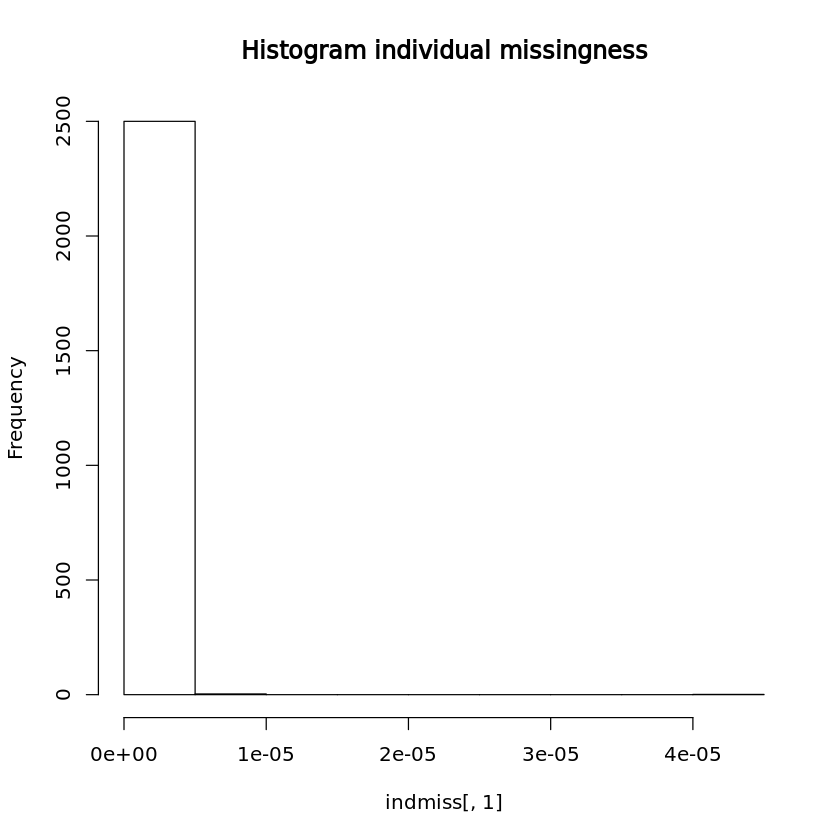

In [12]:
hist(indmiss[,1],main="Histogram individual missingness")

In [13]:
indmiss %>% summarise(mean= mean(F_MISS), sd= sd(F_MISS), max = max(F_MISS),min = min(F_MISS))

mean,sd,max,min
<dbl>,<dbl>,<dbl>,<dbl>
6.524444e-07,1.187993e-06,4.291e-05,0


In [14]:
indmiss %>% filter(F_MISS > 0) %>% dim_desc

[1] "[1,234 x 1]"

In [15]:
indmiss %>% filter(F_MISS > 0.01) %>% dim_desc

[1] "[0 x 1]"

# Variants

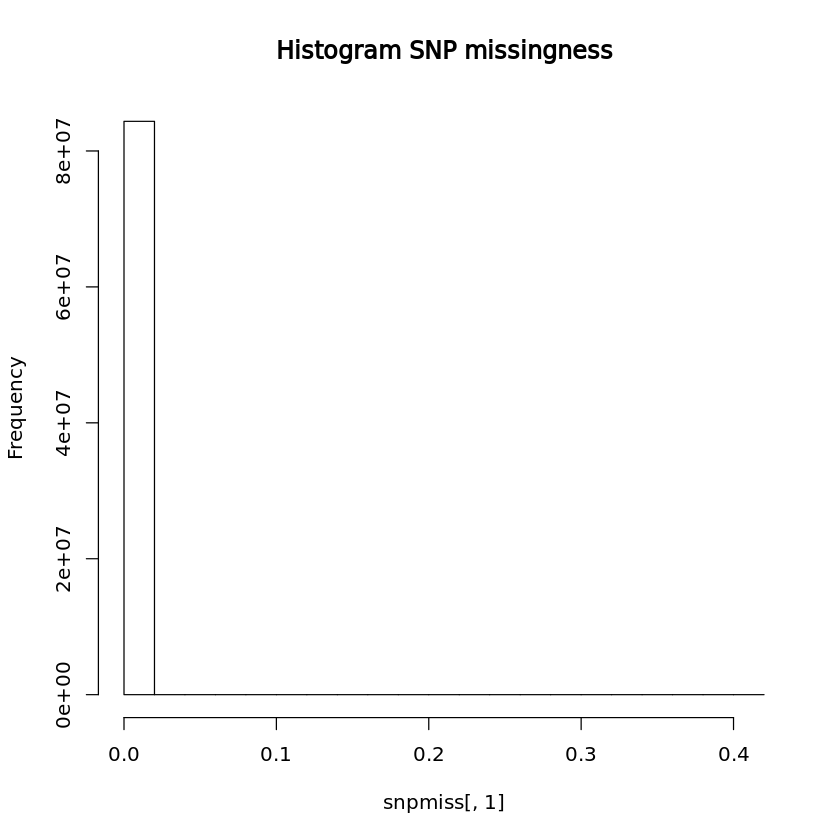

In [16]:
hist(snpmiss[,1],main="Histogram SNP missingness")  

In [17]:
snpmiss %>% summarise(mean= mean(F_MISS), sd= sd(F_MISS), max = max(F_MISS),min = min(F_MISS))

mean,sd,max,min
<dbl>,<dbl>,<dbl>,<dbl>
1.307312e-06,0.0004305211,0.4104,0


In [18]:
snpmiss %>% filter(F_MISS > 0) %>% dim_desc

[1] "[5,799 x 1]"

In [19]:
snpmiss %>% filter(F_MISS > 0.01) %>% dim_desc

[1] "[1,515 x 1]"

Only remove variants with missingness > 0.01